In [1]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import imutils


# Import image

In [29]:
img_path = 'realpars_p_id_diag_mod.png'
img = cv2.imread(img_path, 1)
img_orig = img.copy()

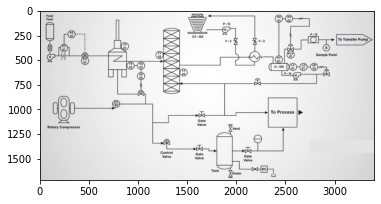

In [31]:
plt.imshow(img_orig)
plt.show()

In [4]:
img.shape

(1716, 3405, 3)

In [19]:
# height, width, depth and ratio
h, w, d = img.shape
resized_w = 1400
ratio = resized_w / w

# resize image
resized = imutils.resize(img, width=resized_w)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# blurr the image
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Identify circles
all_circles = cv2.HoughCircles(
    blur,
    method=cv2.HOUGH_GRADIENT,
    dp=0.1,
    minDist=10,
    param1=20,
    param2=10,
    minRadius=14,
    maxRadius=16,
)
circles = np.uint16(np.around(all_circles))
print("It found " + str(circles.shape[1]) + " circles on the pi&d")

It found 39 circles on the pi&d


In [20]:
circles.shape

(1, 39, 3)

In [21]:
circles[0].shape

(39, 3)

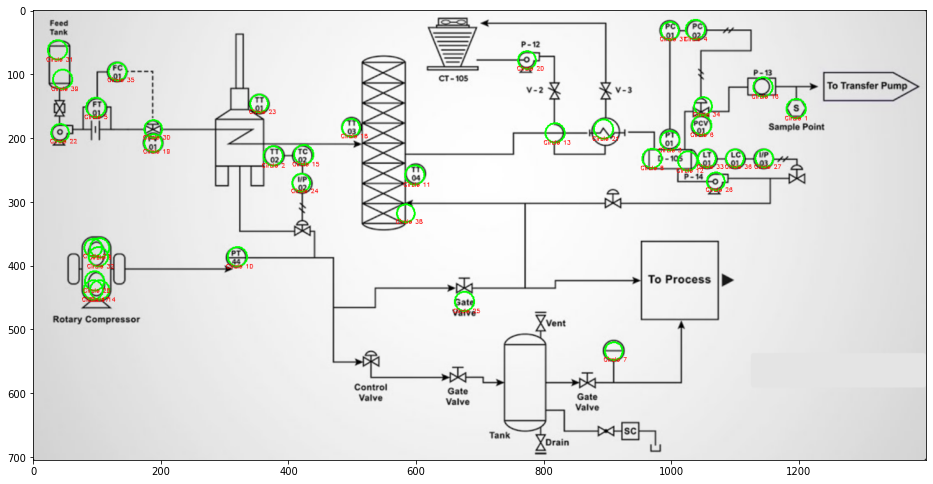

In [22]:
count = 1
img_circles = resized.copy()
for circle in circles[0]:
    # annotate circle and centroid
    cv2.circle(img_circles, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
#     cv2.circle(img_circles, (circle[0], circle[1]), 2, (255, 0, 0), -2)

    # annotate text
    offset_txt = int(circle[2] * 1.2)
    cv2.putText(
        img_circles,
        "Circle " + str(count),
        (circle[0] - offset_txt, circle[1] + offset_txt),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.3,
        (255, 0, 0),
        1,
    )
    count += 1
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img_circles)
plt.show()

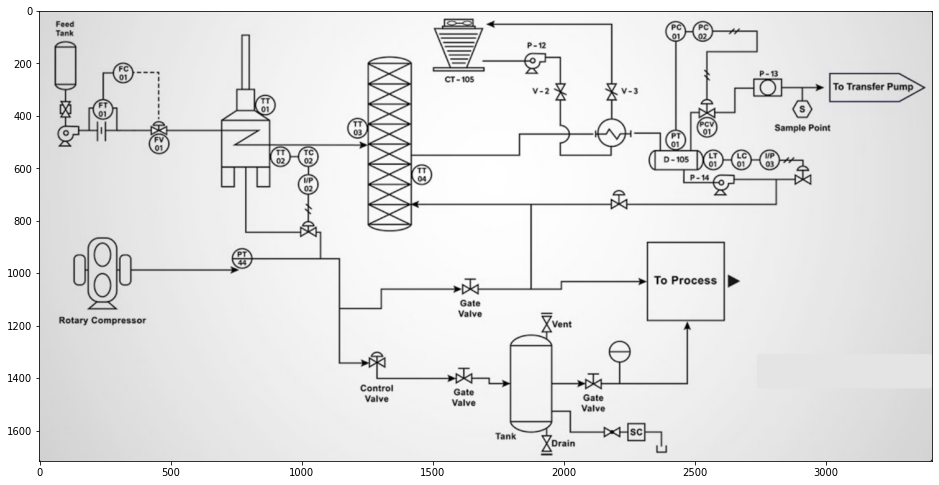

In [23]:
plt.imshow(img)
plt.show()

# Cropped images

In [24]:
# OCR
import re

cropped_imgs = []
cropped_imgs_txt = []

img_circle_txt = img_orig.copy()

for idx, i in enumerate(circles[0]):
    radius = np.uint16(i[2]*.75)
    cropped_img_lower = img_circle_txt[i[1]:i[1]+radius,
                                       i[0]-radius:i[0]+radius]
    cropped_img_upper = img_circle_txt[i[1]-radius:i[1],
                                       i[0]-radius:i[0]+radius]
#     cropped_img = cv2.threshold(cropped_img, 100, 255, cv2.THRESH_BINARY)
    cropped_imgs.append(np.append(cropped_img_upper,
                                  cropped_img_lower, 
                                  axis=0))

In [26]:
# for i in range(len(cropped_imgs)):
#     plt.imshow(cropped_imgs[i])
#     plt.show()

# Function

In [27]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import imutils
import re

In [2]:
# def load_image(url):
#     img_path = url
#     img = cv2.imread(img_path, 1)
#     return img

# def preprocessing(img, ratio): # try for ratio = 0.085
    
#     ratio = ratio
#     # store height, width, 
#     # depth and ratio
#     h, w, d = img.shape
#     resized_width = round(ratio * w)

#     # resize image
#     resized_image = imutils.resize(img, width=resized_width)
    
#     # tranform to grayscale
#     gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

#     # blur image
#     blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
#     return resized_image, gray_image, blur_image, ratio

# def find_circles(img, blur_image, resized_image):
#     # identify circles
#     circles = cv2.HoughCircles(
#         blur_image,
#         method=cv2.HOUGH_GRADIENT,
#         dp=0.1,
#         minDist=10,
#         param1=20,
#         param2=10,
#         minRadius=11,
#         maxRadius=12,
#     )

#     # smooth to integer
#     circles = np.uint16(np.around(circles))
#     print(str(circles.shape[1]) + " circles found on the pi&d")

#     count = 1
#     img_circles = resized_image.copy()
#     for circle in circles[0]:
#         # Annotate circle and centroid
#         cv2.circle(img_circles, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
#         cv2.circle(img_circles, (circle[0], circle[1]), 2, (255, 0, 0), -2)

#         # Annotate text
#         offset_txt = int(circle[2] * 1.2)
#         cv2.putText(
#             img_circles,
#             "Circle " + str(count),
#             (circle[0] - offset_txt, circle[1] + offset_txt),
#             cv2.FONT_HERSHEY_SIMPLEX,
#             0.3,
#             (255, 0, 0),
#             1,
#         )
#         count += 1
    
#     plt.rcParams['figure.figsize'] = (16,9)
#     plt.imshow(img_circles)
#     plt.imsave(fname='img_output_circles.jpg', 
#                arr=img_circles)

#     return circles

# def ocr_text(img, circles, ratio):
#     # Read information in every circle
#     cropped_imgs = []
#     cropped_imgs_txt = []
#     img_circle_txt = img.copy()

#     circles_int = (circles[0] // ratio).astype(int)

#     for circle in circles_int:
#         up = ""
#         low = ""

#         x_offset_right = np.uint16(circle[2] * 0.79)
#         x_offset_left = np.uint16(circle[2] * 0.65)
#         y_offset_low = np.uint16(circle[2] * 0.72)
#         y_offset_up = np.uint16(circle[2] * 0.56)
#         cropped_img_lower = img_circle_txt[
#             circle[1] : circle[1] + y_offset_low,
#             circle[0] - x_offset_left : circle[0] + x_offset_right,
#         ]
#         cropped_img_upper = img_circle_txt[
#             circle[1] - y_offset_up : circle[1],
#             circle[0] - x_offset_left : circle[0] + x_offset_right,
#         ]
#         cropped_imgs.append(np.append(cropped_img_upper, cropped_img_lower, axis=0))

#         upper = pytesseract.image_to_string(
#             cropped_img_upper,
#             lang="eng",
#             config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ",)
#         lower = pytesseract.image_to_string(
#             cropped_img_lower,
#             config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789",)

#         r_upper = re.compile(r"[A-Z]+")
#         r_lower = re.compile(r"[A-Z0-9]+")

#         if not upper.isspace():
#             if re.match(r_upper, str(upper)).group(0) is not None:
#                 up = re.match(r_upper, str(upper)).group(0)            
#         if not lower.isspace():
#             if re.match(r_lower, str(lower)).group(0) is not None:
#                 low = re.match(r_lower, str(lower)).group(0)

#         cropped_imgs_txt.append(up + "-" + low)
    
#     return cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int

# def read_text_in_circles(url, ratio):
#     img = load_image(url)
#     resized_image, gray_image, blur_image, ratio = preprocessing(img, ratio)
#     circles = find_circles(img, blur_image, resized_image)
#     cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int = ocr_text(img, circles, ratio)
    
#     return circles, img_circle_txt, cropped_imgs_txt

In [38]:
def load_image(url):
    img_path = url
    img = cv2.imread(img_path, 1)
    return img

def preprocessing(img, resized_width): # try for resized_width = 1400
    # store height, width, 
    # depth and ratio
    h, w, d = img.shape
#     resized_w = 1400
    ratio = resized_width / w

    # resize image
    resized_image = imutils.resize(img, width=resized_width)
    
    # tranform to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # blur image
    blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    return resized_image, gray_image, blur_image, ratio

def find_circles(img, blur_image, resized_image, minRadius, maxRadius):
    # identify circles
    circles = cv2.HoughCircles(
        blur_image,
        method=cv2.HOUGH_GRADIENT,
        dp=0.1,
        minDist=10,
        param1=20,
        param2=10,
        minRadius = minRadius,
        maxRadius= maxRadius
#         minRadius=11,
#         maxRadius=12,
    )

    # smooth to integer
    circles = np.uint16(np.around(circles))
    print(str(circles.shape[1]) + " circles found on the pi&d")

    count = 1
    img_circles = resized_image.copy()
    for circle in circles[0]:
        # Annotate circle and centroid
        cv2.circle(img_circles, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
        cv2.circle(img_circles, (circle[0], circle[1]), 2, (255, 0, 0), -2)

        # Annotate text
        offset_txt = int(circle[2] * 1.2)
        cv2.putText(
            img_circles,
            "Circle " + str(count),
            (circle[0] - offset_txt, circle[1] + offset_txt),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.3,
            (255, 0, 0),
            1,
        )
        count += 1
    
    plt.rcParams['figure.figsize'] = (16,9)
    plt.imshow(img_circles)
    plt.imsave(fname='img_output_circles.jpg', 
               arr=img_circles)

    return circles

def ocr_text(img, circles, ratio):
    # Read information in every circle
    cropped_imgs = []
    cropped_imgs_txt = []
    img_circle_txt = img.copy()

    circles_int = (circles[0] // ratio).astype(int)

    for circle in circles_int:
        up = ""
        low = ""

        x_offset_right = np.uint16(circle[2] * 0.79)
        x_offset_left = np.uint16(circle[2] * 0.65)
        y_offset_low = np.uint16(circle[2] * 0.72)
        y_offset_up = np.uint16(circle[2] * 0.56)

#         x_offset_right = np.uint16(circle[2] * 1)
#         x_offset_left = np.uint16(circle[2] * 1)
#         y_offset_low = np.uint16(circle[2] * 1)
#         y_offset_up = np.uint16(circle[2] * 1)
        
        cropped_img_lower = img_circle_txt[
            circle[1] : circle[1] + y_offset_low,
            circle[0] - x_offset_left : circle[0] + x_offset_right,
        ]
        cropped_img_upper = img_circle_txt[
            circle[1] - y_offset_up : circle[1],
            circle[0] - x_offset_left : circle[0] + x_offset_right,
        ]
        cropped_imgs.append(np.append(cropped_img_upper, cropped_img_lower, axis=0))

        upper = pytesseract.image_to_string(
            cropped_img_upper,
            lang="eng",
            config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ",)
        lower = pytesseract.image_to_string(
            cropped_img_lower,
            config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789",)

        r_upper = re.compile(r"[A-Z]+")
        r_lower = re.compile(r"[A-Z0-9]+")

        if not upper.isspace():
            if re.match(r_upper, str(upper)).group(0) is not None:
                up = re.match(r_upper, str(upper)).group(0)            
        if not lower.isspace():
            if re.match(r_lower, str(lower)).group(0) is not None:
                low = re.match(r_lower, str(lower)).group(0)

        cropped_imgs_txt.append(up + "-" + low)
    
    return cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int

def read_text_in_circles(url, resized_width, minRadius, maxRadius):
    img = load_image(url)
    resized_image, gray_image, blur_image, ratio = preprocessing(img, resized_width)
    circles = find_circles(img, blur_image, resized_image, minRadius,maxRadius)
    cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int = ocr_text(img, circles, ratio)
    
    return circles, img_circle_txt, cropped_imgs_txt

92 circles found on the pi&d


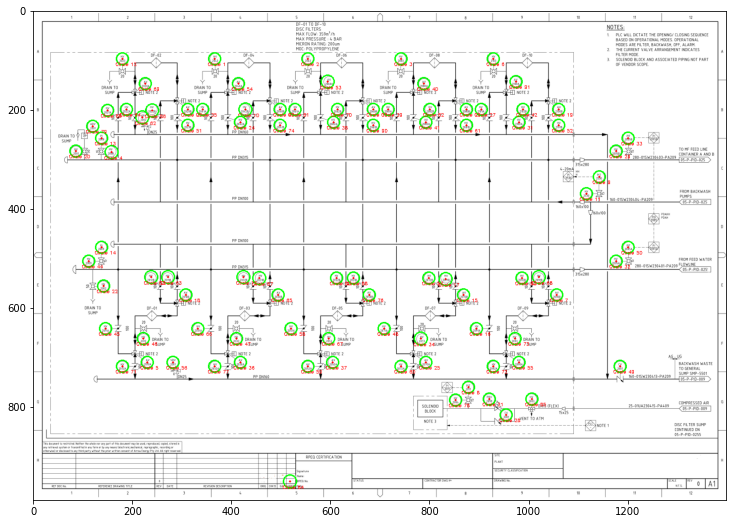

In [39]:
circles, img_circle_txt, cropped_imgs_txt = read_text_in_circles('output1.jpg', 1400, 12, 14)

In [40]:
# cropped_imgs_txt[0:6]
cropped_imgs_txt

['AV-2043',
 'HV-2063',
 'HV-2083',
 'HV-2008J',
 'CAV-2010A',
 'AV-2103',
 'E-2090B',
 'T-2011',
 'PIT-2530',
 'HVY-2042B',
 'HV-2530',
 'HAVO-2023',
 'PI-2008',
 'P-2009',
 '-2070B',
 'HV-2091A',
 'YAY-',
 'AV-2010B',
 'AV-2100B',
 'CHV-62001',
 'PRY-2099',
 'HV-2002',
 'AV-2020B',
 'HV-20424',
 'AV-2070A',
 'AV-2080B',
 'HV-2101A',
 'CV-62001',
 'HV-2005B',
 'AV-2060B',
 'HV-2102A',
 'HV-2005A',
 'PIT-2005B',
 'H-2073',
 'HV-2041A',
 'AV-2030A',
 'AV-2050A',
 'HV-2062A',
 'HVS-2081A',
 'AV-2080A',
 'HV-2082A',
 'HV-2102B',
 'AV-20408',
 'HV-2009',
 'HVS-2011A',
 'CU-9013',
 '-7033',
 'HV-2071A',
 'CS-62601',
 'PIT-2005A',
 'HV-20218',
 'HV-2101B',
 'AV-2060A',
 'AVS-2040A',
 'AV-2090A',
 'VRVS-2001',
 'SHV-2072B',
 'HV-2051A',
 '-2052A',
 'HV-2072A',
 'HV-2081B',
 'VRV-2002',
 'H-NTBY',
 'HV-2022A',
 'CAV-20308',
 'SHV-20314',
 'S-9053',
 'A-20018',
 '-2020A',
 'HVS-2062B',
 'HVS-2012A',
 'HV-2092A',
 'N-2093',
 'HV-2041B',
 'A-20398',
 'AV-2050B',
 'CHV-2032A',
 'HVC-2004',
 'ARVS-

In [41]:
len(cropped_imgs_txt)

92

39 circles found on the pi&d


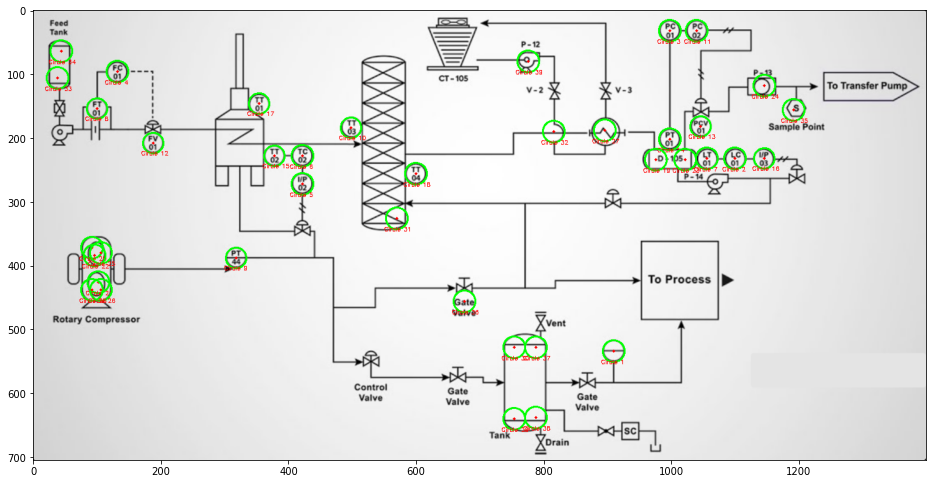

In [47]:
circles, img_circle_txt, cropped_imgs_txt = read_text_in_circles('realpars_p_id_diag_mod.png', 1400, 16, 18)

In [48]:
len(cropped_imgs_txt)

39

In [54]:
for count, value in enumerate(cropped_imgs_txt, start=1):
    print(count, value)

1 ST-
2 LG-OV
3 FTU-OL
4 FQ-O1
5 P-02
6 WW-0O2
7 -OV
8 -O1
9 -44
10 -Q3
11 FU-O2
12 TY-O1
13 PCY-017
14 -OO
15 -O
16 VP-O2
17 -1
18 -O4
19 TT-
20 -
21 -7
22 -
23 -
24 B-
25 -7
26 J-SS
27 -NX
28 -M
29 -
30 -
31 T-
32 -
33 -ES
34 -
35 -
36 -A
37 -
38 -
39 ST-


39 circles found on the pi&d


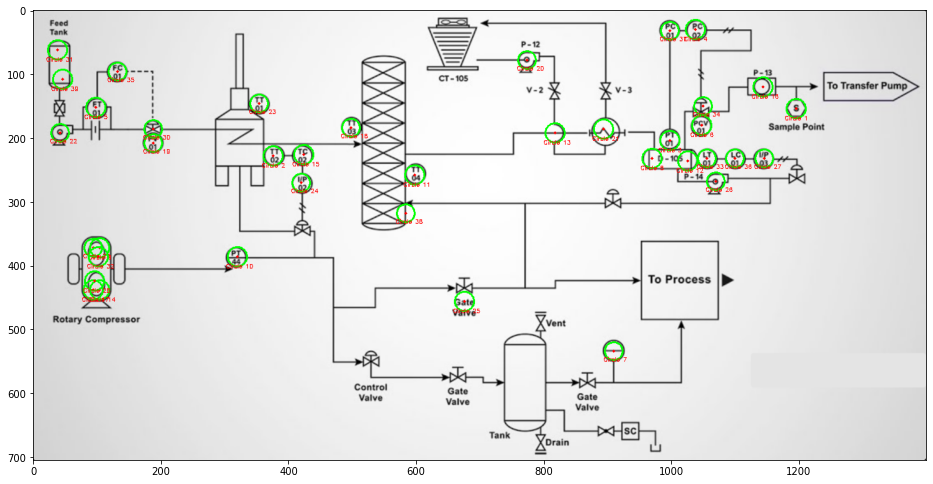

In [42]:
circles, img_circle_txt, cropped_imgs_txt = read_text_in_circles('realpars_p_id_diag_mod.png', 1400, 14, 16)

In [43]:
cropped_imgs_txt

['-TL',
 '-',
 '-O',
 'PRPC-7',
 'TT-A',
 'Y-A',
 '-',
 '-1',
 '-5',
 'PT-A',
 'F-O4',
 'CT-T',
 '-',
 'J-',
 'TC-N',
 'SE-',
 '-',
 '-',
 'T-O',
 '-L',
 '-',
 '-4',
 '-N',
 'OP-',
 '-',
 '-',
 'VP-N2',
 'SS-I',
 '-',
 'NN-A',
 '-7',
 '-',
 'LL-',
 '-4',
 'TU-N',
 'LU-',
 'TVY-',
 '-I',
 '-']

In [ ]:
import numpy as np
for ratio in [x / 1000.0 for x in range(85, 100, 1)]:
# for ration in np.arange(0.085, 0.1, 0.005):
    print(ratio)
    circles, img_circle_txt, cropped_imgs_txt = read_text_in_circles('realpars_p_id_diag_mod.png', ratio)

In [ ]:
circles, img_circle_txt, cropped_imgs_txt = read_text_in_circles('realpars_p_id_diag_mod.png', 0.084)

# updated version

it crushes, so it is a modified version

https://github.com/diegogiraldog/pid-scraper/blob/main/identify_circles.py

In [19]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import imutils
import re

In [20]:
# load image
img_path = "output1.jpg"
alt_img_path = "realpars_p_id_diag_mod.png"
# img = cv2.imread(alt_img_path, 1)
img = cv2.imread(img_path, 1)

In [21]:
# plt.imshow(img)
# plt.show()

In [22]:
# height, width, depth and ratio
h, w, d = img.shape

In [23]:
resize_factor = 1

In [24]:
# resize image
resized = imutils.resize(img, width=int(w / resize_factor))
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# blurr the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Identify circles
all_circles = cv2.HoughCircles(
    blurred,
    method=cv2.HOUGH_GRADIENT,
    dp=0.1,
    minDist=int(100 / resize_factor),
    param1=int(20 / resize_factor),
    param2=int(10 / resize_factor),
    minRadius=int(115 / resize_factor),
    maxRadius=int(120 / resize_factor),
)

circles = np.uint16(np.around(all_circles))
print("Found " + str(circles.shape[1]) + " circles on the pi&d")

# print(circles)

Found 122 circles on the pi&d


In [27]:
count = 1
img_circles = resized.copy()
for circle in circles[0]:
    # Annotate circle and centroid
    cv2.circle(img_circles, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
    cv2.circle(img_circles, (circle[0], circle[1]), 2, (255, 0, 0), -2)

    # Annotate text
    offset_txt = int(circle[2] * 1.2)
    cv2.putText(
        img_circles,
        "Circle " + str(count),
        (circle[0] - offset_txt, circle[1] + offset_txt),
        cv2.FONT_HERSHEY_SIMPLEX,
#         0.3,
        3,
        (255, 0, 0),
        10,
    )
    count += 1


# cv2.imshow("Image", img_circles)
cv2.imwrite("circles.png", img_circles)

# cv2.waitKey(0)

True

In [7]:
cropped_imgs = []
cropped_imgs_txt = []
img_circle_txt = img.copy()

circles_int = circles[0] * resize_factor

for circle in circles_int:
    x_offset_right = np.uint16(circle[2] * 0.75)
    x_offset_left = np.uint16(circle[2] * 0.75)
    y_offset_low = np.uint16(circle[2] * 0.75)
    y_offset_up = np.uint16(circle[2] * 0.75)
    cropped_img_lower = img_circle_txt[
        circle[1] : circle[1] + y_offset_low,
        circle[0] - x_offset_left : circle[0] + x_offset_right,
    ]
    cropped_img_upper = img_circle_txt[
        circle[1] - y_offset_up : circle[1],
        circle[0] - x_offset_left : circle[0] + x_offset_right,
    ]
    
    # cropped_img = cv2.threshold(cropped_img, 100, 255, cv2.THRESH_BINARY)
    cropped_imgs.append(np.append(cropped_img_upper, cropped_img_lower, axis=0))

    upper = pytesseract.image_to_string(
        cropped_img_upper,
        lang="eng",
        config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ",
    )
    lower = pytesseract.image_to_string(
        cropped_img_lower,
        config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789",
    )

    r_upper = re.compile(r"[A-Z]+")
    r_lower = re.compile(r"[A-Z0-9]+")

    #if r_upper.match(str(upper)) is not None:
        #up = r_upper.match(str(upper)).group(0)

    #if r_lower.match(str(lower)) is not None:
        #low = r_lower.match(str(lower)).group(0)
#     up = "empty"    
    if not upper.isspace():
        if re.match(r_upper, str(upper)).group(0) is not None:
            up = re.match(r_upper, str(upper)).group(0)            
    if not lower.isspace():
        if re.match(r_lower, str(lower)).group(0) is not None:
            low = re.match(r_lower, str(lower)).group(0)        

    cropped_imgs_txt.append(up + "-" + low)

# print("save image as img_output.jpg")
plt.imsave(fname="img_output.jpg", arr=img_circles)

In [9]:
for idx, c_img in enumerate(cropped_imgs):
    cv2.putText(
        c_img,
        cropped_imgs_txt[idx],
        (50, 75),
        cv2.FONT_HERSHEY_SIMPLEX,
        3,
        (0, 0, 255),
        8,
    )
    print(idx, cropped_imgs_txt[idx])
#     cv2.imshow("Image", c_img)

0 HV-2081A
1 AV-2040B
2 HV-2073
3 HV-2012B
4 HV-2011B
5 HV-2061B
6 HV-2052A
7 HV-2091B
8 HV-2042B
9 HV-2091A
10 HV-2082B
11 HV-2092B
12 AV-2100B
13 HV-2043
14 AV-2030A
15 HV-2031B
16 HV-2071A
17 AV-2080B
18 AV-2090A
19 HV-2062A
20 AV-2080A
21 HV-2011A
22 HV-2021A
23 AV-2020B
24 HV-2042A
25 AV-2030B
26 HV-2063
27 AV-2050A
28 HV-2072B
29 HV-2005A
30 VRV-2001
31 HV-2001
32 HV-2002
33 VRV-2002
34 HV-2051A
35 HV-2005B
36 HV-2009
37 AV-2060A
38 HV-2082A
39 AV-2070B
40 HV-2530
41 CV-2601
42 HV-2041B
43 HV-2061A
44 PRV-2099
45 HV-2102A
46 ARV-2001
47 HV-2023
48 HV-2032B
49 HV-2062B
50 HV-2081B
51 AV-2090B
52 HV-2008
53 HV-2012A
54 AV-2050B
55 HV-2071B
56 HV-2093
57 CV-2001
58 HV-2101B
59 HV-2022B
60 HV-2041A
61 HV-2102B
62 HV-2101A
63 HV-2031A
64 HV-2072A
65 HV-2083
66 HV-2103
67 AVE-2020A
68 HV-2003
69 HV-2022A
70 HV-2092A
71 HV-2021B
72 AVE-2040A
73 AV-207T0A
74 AV-2100A
75 HV-2004
76 AV-2010B
77 AV-2010A
78 HV-2033
79 HV-2053
80 HV-2052B
81 AV-2060B
82 HV-2032A
83 HV-2051B
84 HV-2013
85 P-2

In [14]:
len(cropped_imgs)

122

In [16]:
cropped_imgs[0].shape

(178, 178, 3)

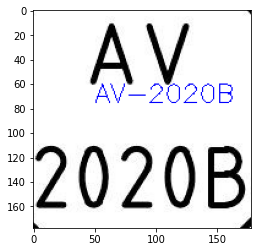

In [25]:
plt.imshow(cropped_imgs[23], cmap='gray')

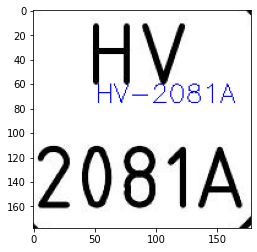

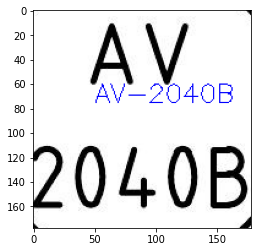

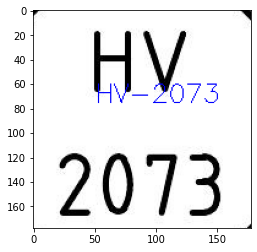

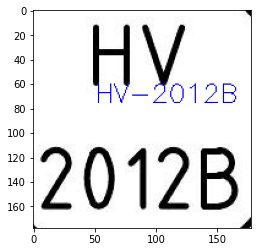

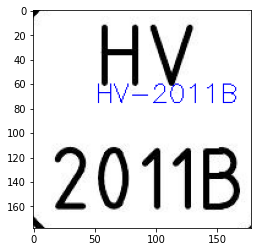

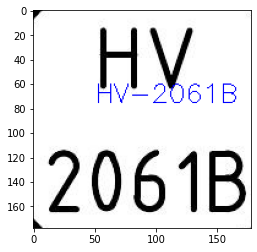

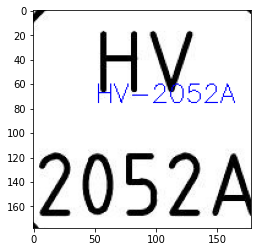

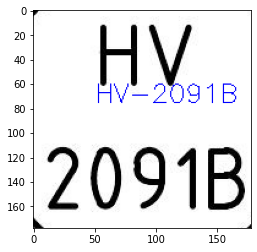

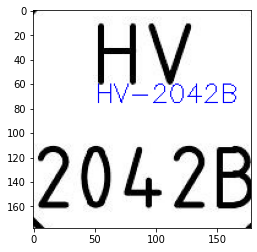

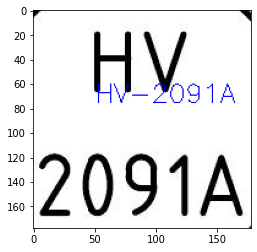

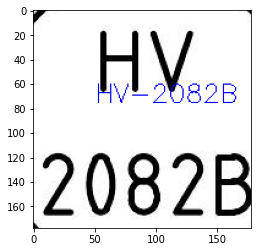

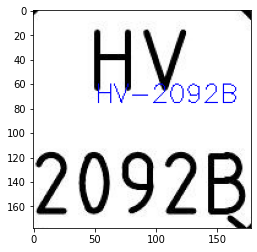

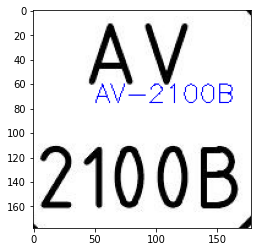

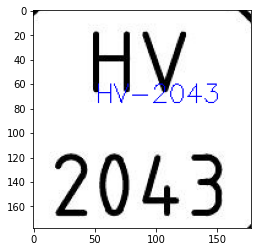

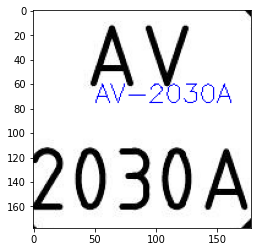

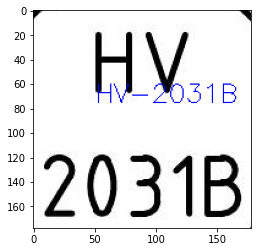

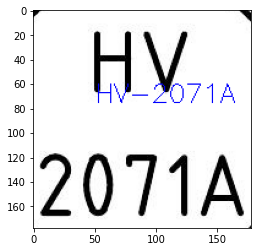

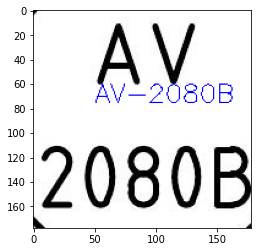

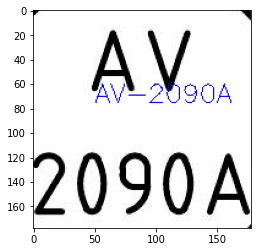

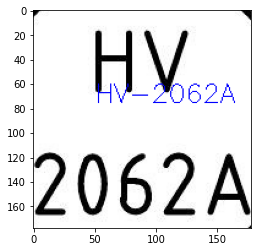

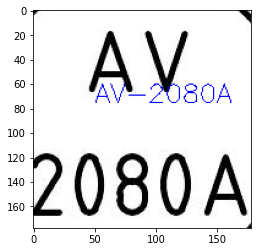

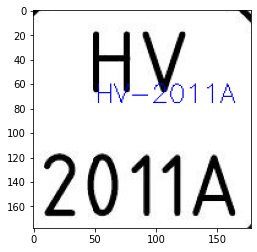

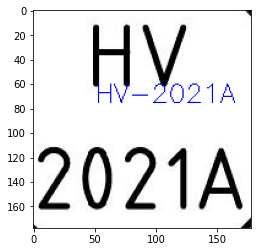

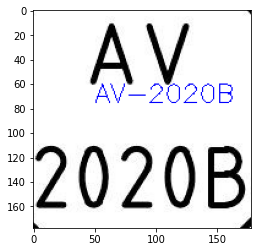

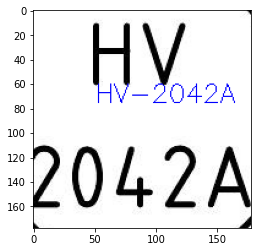

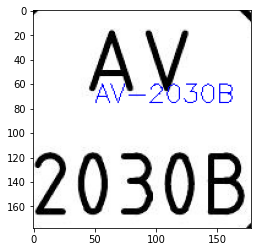

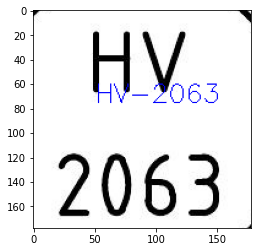

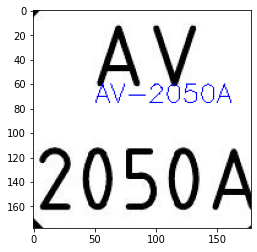

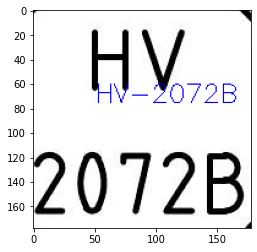

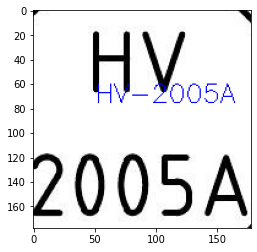

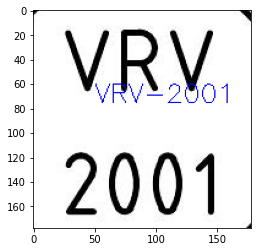

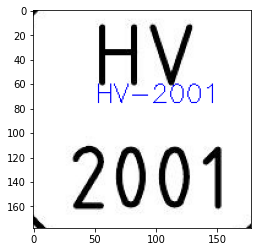

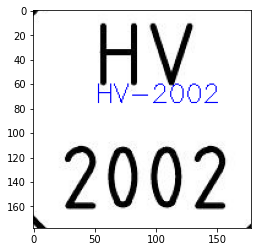

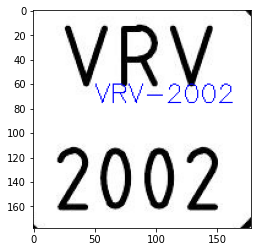

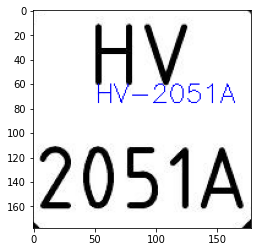

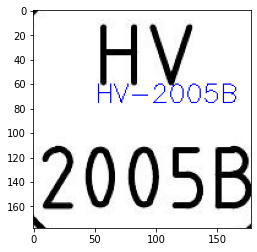

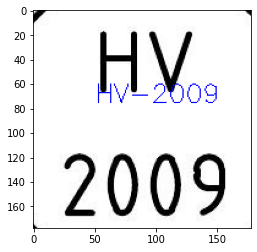

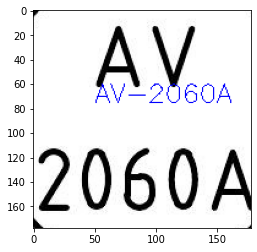

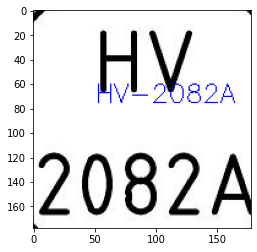

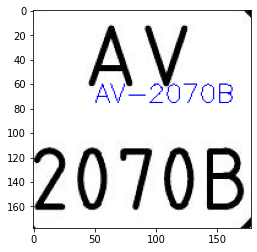

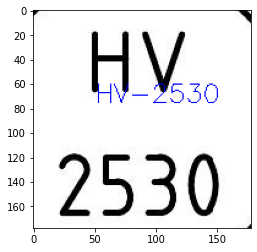

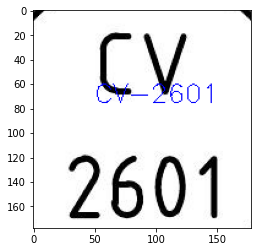

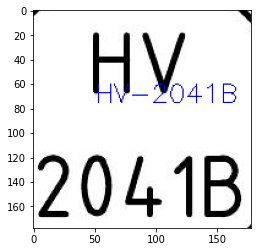

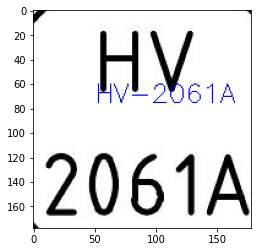

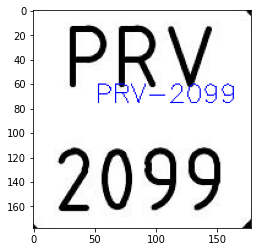

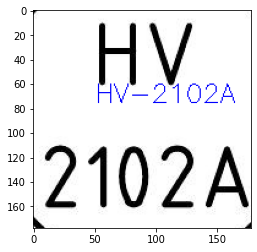

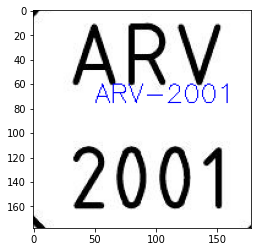

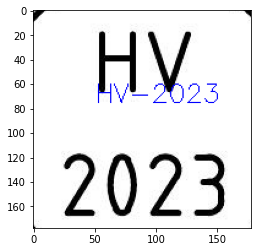

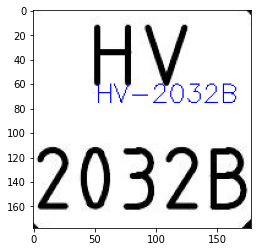

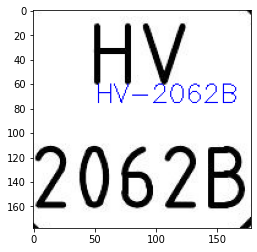

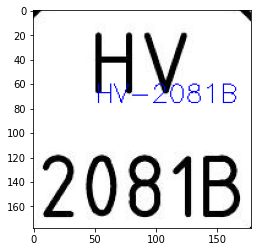

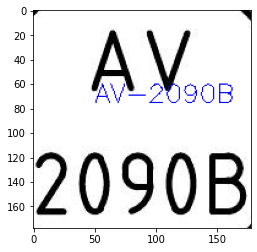

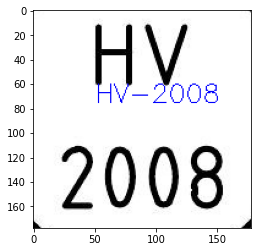

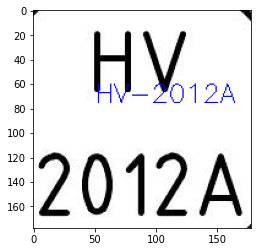

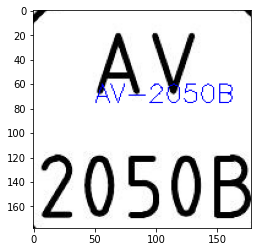

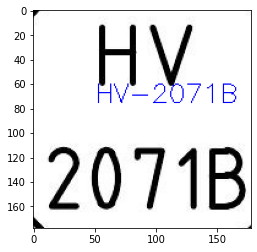

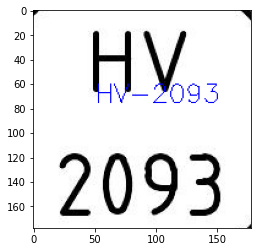

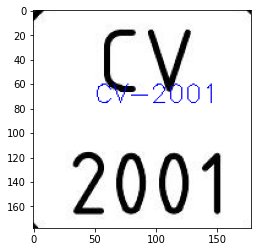

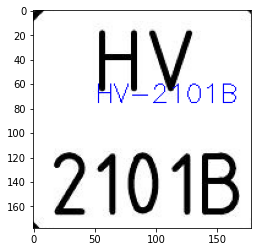

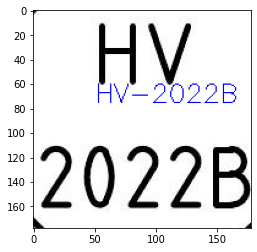

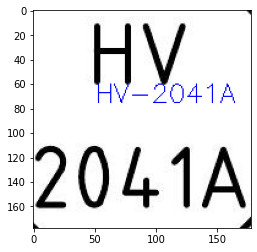

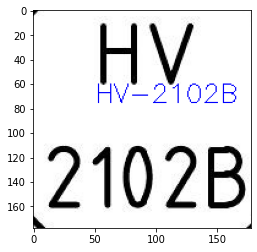

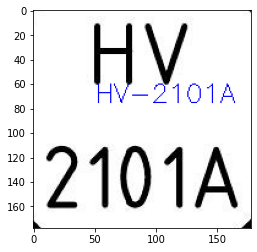

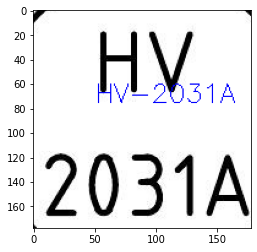

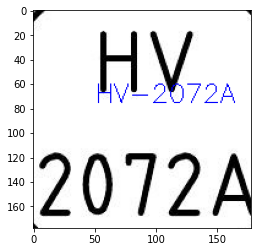

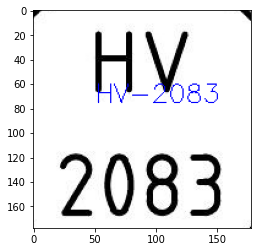

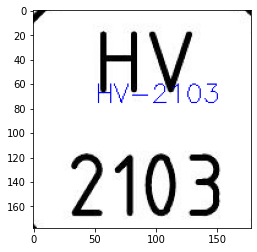

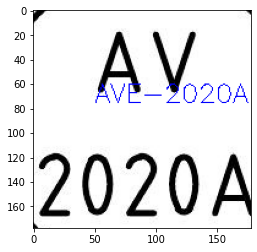

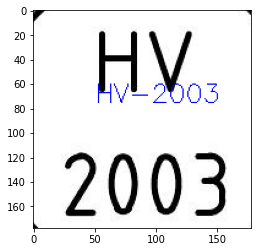

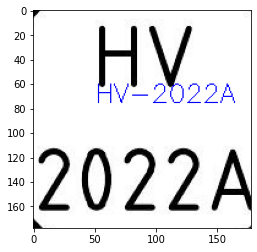

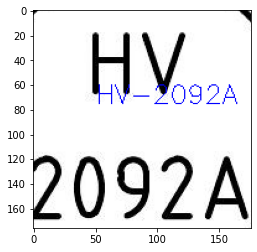

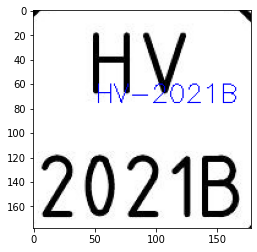

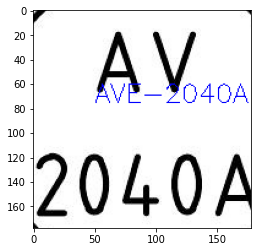

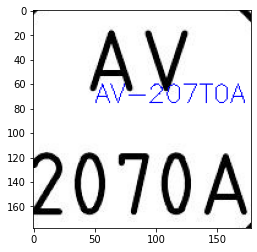

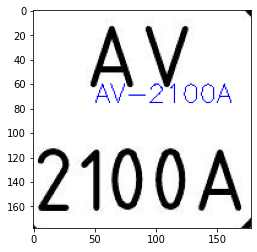

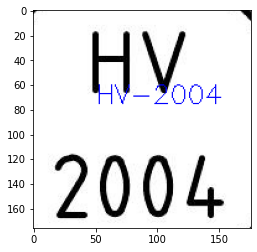

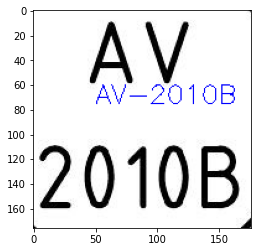

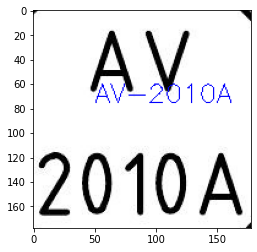

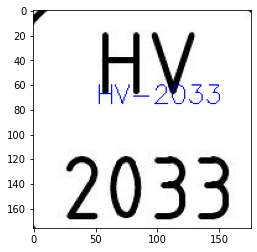

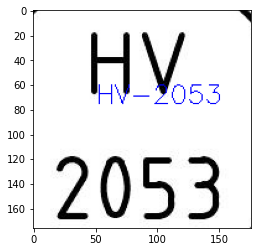

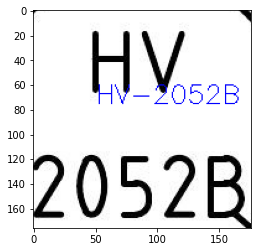

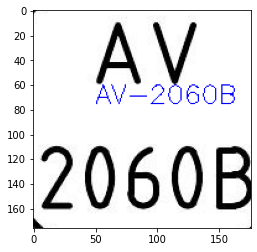

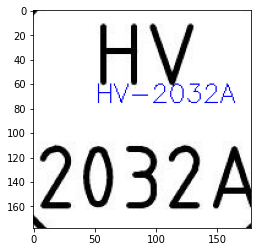

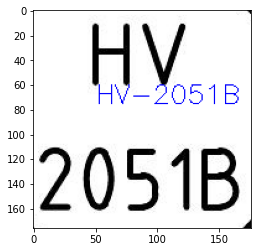

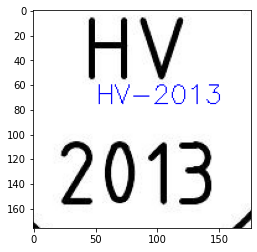

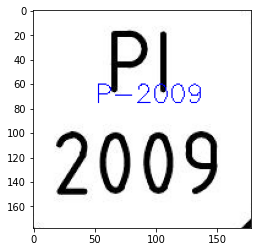

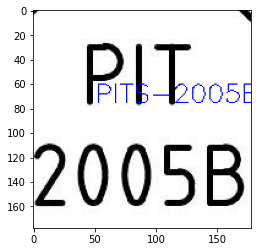

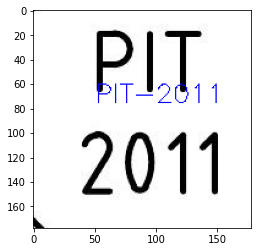

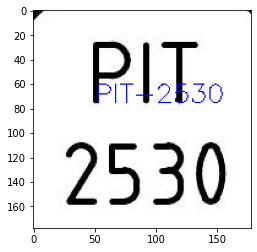

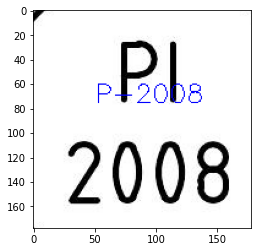

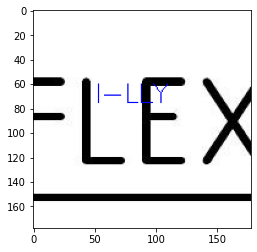

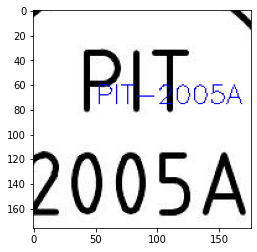

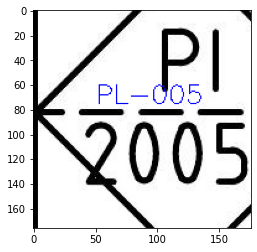

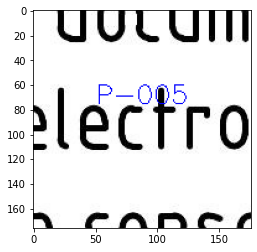

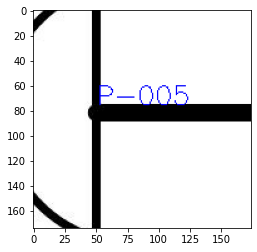

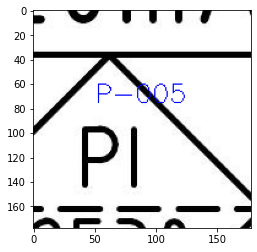

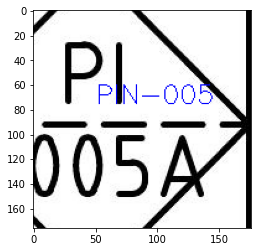

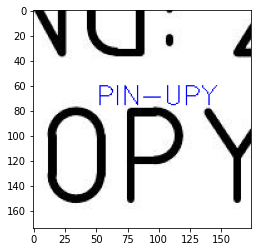

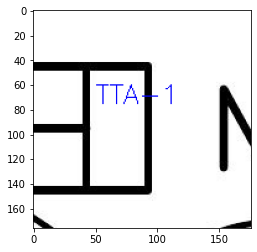

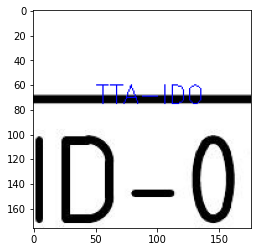

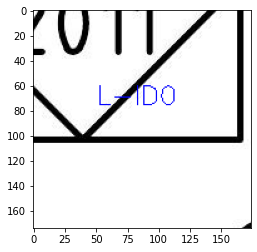

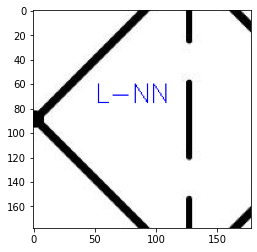

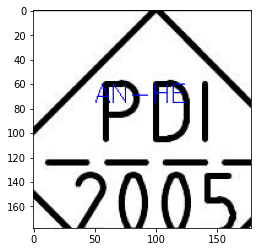

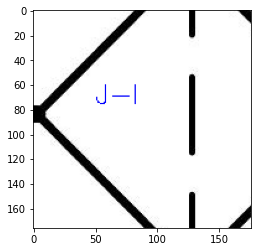

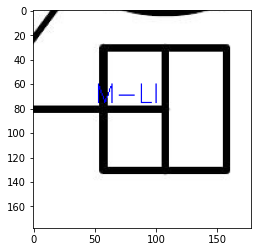

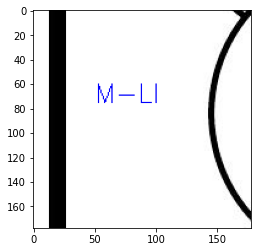

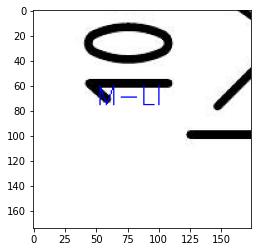

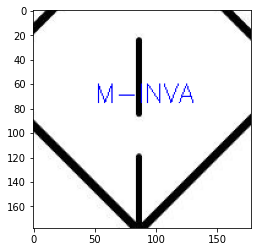

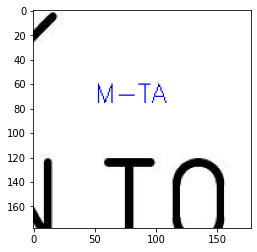

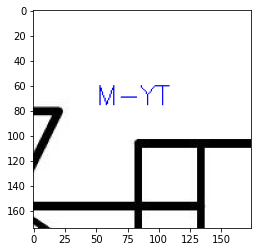

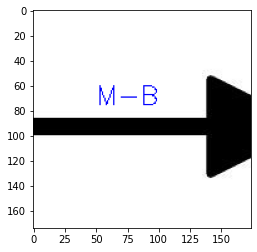

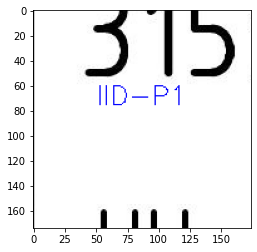

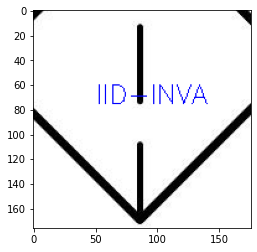

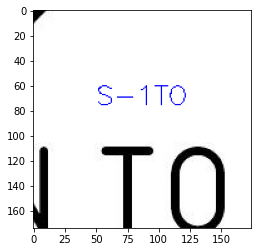

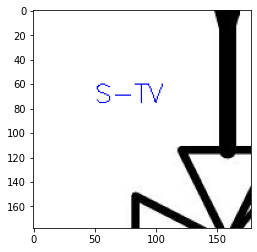

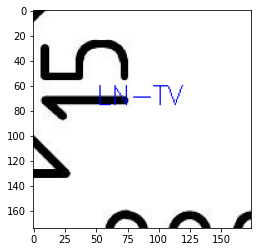

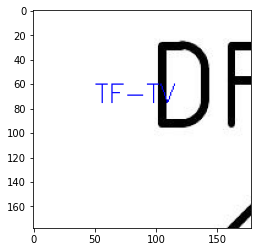

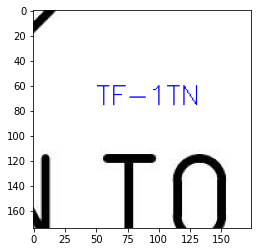

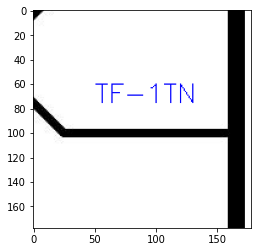

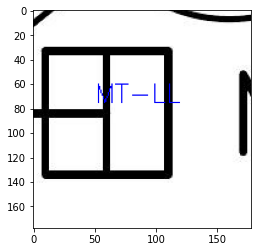

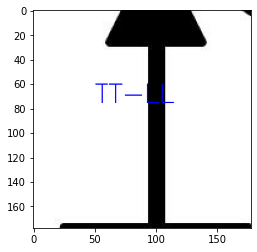

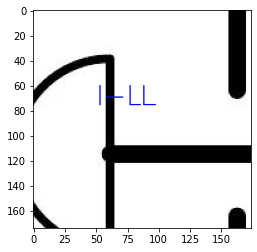

In [28]:
for image in range(len(cropped_imgs)):
    plt.imshow(cropped_imgs[image],cmap='gray')
    plt.show()

## updated functions

In [17]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import imutils
import re
from tqdm import tqdm

def load_image(url):
    img_path = url
    img = cv2.imread(img_path, 1)
    return img

def preprocessing(img, resize_factor): # try for resize_factor = 1
    # store height, width, 
    # depth and ratio
    h, w, d = img.shape
    resize_factor = resize_factor

    # resize image
    resized_image = imutils.resize(img, width=int(w / resize_factor))
    
    # tranform to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # blur image
    blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    return resized_image, gray_image, blur_image

def find_circles(img, blur_image, resized_image, resize_factor, minRadius, maxRadius):
    # identify circles
    all_circles = cv2.HoughCircles(blur_image,
    method=cv2.HOUGH_GRADIENT,
    dp=0.1,
    minDist=int(100 / resize_factor),
    param1=int(20 / resize_factor),
    param2=int(10 / resize_factor),
    minRadius=int(minRadius / resize_factor), # maxRadius=115
    maxRadius=int(maxRadius / resize_factor)) # maxRadius=120

    circles = np.uint16(np.around(all_circles))
    print("Found " + str(circles.shape[1]) + " circles.")


    count = 1
    img_circles = resized_image.copy()
    for circle in circles[0]:
        # Annotate circle and centroid
        cv2.circle(img_circles, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
        cv2.circle(img_circles, (circle[0], circle[1]), 2, (255, 0, 0), -2)

        # Annotate text
        offset_txt = int(circle[2] * 1.2)
        cv2.putText(
            img_circles,
            "Circle " + str(count),
            (circle[0] - offset_txt, circle[1] + offset_txt),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.3,
            (255, 0, 0),
            1,
        )
        count += 1
    
    plt.rcParams['figure.figsize'] = (16,9)
    plt.imshow(img_circles)
    plt.imsave(fname='img_output_circles.jpg', 
               arr=img_circles)

    return circles, img_circles

def ocr_text(img, circles, resize_factor, img_circles):
    # Read information in every circle
    cropped_imgs = []
    cropped_imgs_txt = []
    img_circle_txt = img.copy()

    circles_int = circles[0] * resize_factor

    for circle in tqdm(circles_int):
        up = ""
        low = ""

        x_offset_right = np.uint16(circle[2] * 0.79)
        x_offset_left = np.uint16(circle[2] * 0.65)
        y_offset_low = np.uint16(circle[2] * 0.72)
        y_offset_up = np.uint16(circle[2] * 0.56)

        cropped_img_lower = img_circle_txt[
            circle[1] : circle[1] + y_offset_low,
            circle[0] - x_offset_left : circle[0] + x_offset_right
        ]
        cropped_img_upper = img_circle_txt[
            circle[1] - y_offset_up : circle[1],
            circle[0] - x_offset_left : circle[0] + x_offset_right,
        ]
        cropped_imgs.append(np.append(cropped_img_upper, cropped_img_lower, axis=0))

        upper = pytesseract.image_to_string(
            cropped_img_upper,
            lang="eng",
            config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ",)
        lower = pytesseract.image_to_string(
            cropped_img_lower,
            config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789",)

        r_upper = re.compile(r"[A-Z]+")
        r_lower = re.compile(r"[A-Z0-9]+")

        if not upper.isspace():
            if re.match(r_upper, str(upper)).group(0) is not None:
                up = re.match(r_upper, str(upper)).group(0)            
        if not lower.isspace():
            if re.match(r_lower, str(lower)).group(0) is not None:
                low = re.match(r_lower, str(lower)).group(0)

        cropped_imgs_txt.append(up + "-" + low)
        plt.imsave(fname="img_output.jpg", arr=img_circles)
        
    return cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int

def read_text_in_circles(url, resize_factor, minRadius, maxRadius):
    img = load_image(url)
    resized_image, gray_image, blur_image = preprocessing(img, resize_factor)
    circles, img_circles = find_circles(img, blur_image, resized_image, resize_factor, minRadius,maxRadius)
    cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int = ocr_text(img, circles, resize_factor, img_circles)
    
    return circles, img_circle_txt, cropped_imgs_txt

Found 122 circles.


100%|██████████| 122/122 [14:43<00:00,  7.24s/it]


(array([[[ 8474,  2372,   119],
         [ 5908,  2372,   119],
         [ 9278,  7850,   119],
         [ 2814,  6396,   119],
         [ 3210,  6396,   119],
         [ 8116,  2746,   119],
         [ 6556,  8504,   119],
         [12066,  6396,   119],
         [ 5048,  2372,   119],
         [10586,  7598,   119],
         [ 9474,  2366,   119],
         [11668,  6392,   119],
         [12550,  2372,   119],
         [ 4348,  1158,   119],
         [ 4952,  8408,   119],
         [ 5428,  6390,   119],
         [ 8372,  7598,   119],
         [10330,  2372,   119],
         [11592,  8404,   119],
         [ 7164,  2668,   119],
         [ 9330,  1760,   119],
         [ 1732,  7598,   119],
         [ 1782,  2396,   119],
         [ 3694,  2372,   119],
         [ 4952,  2674,   119],
         [ 5858,  6794,   119],
         [ 6562,  1158,   119],
         [ 7160,  8408,   119],
         [ 9456,  6392,   119],
         [13908,  5988,   119],
         [ 3342,  8404,   119],
        

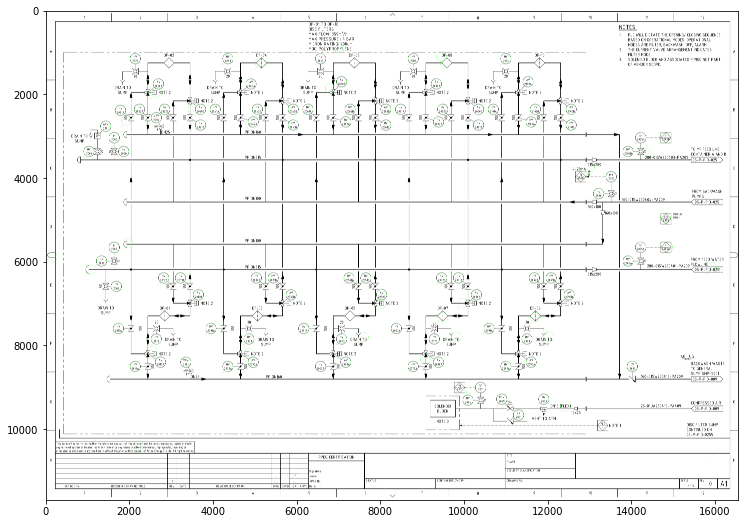

In [18]:
read_text_in_circles("output1.jpg", 1, 115, 120)

In [31]:
ls pids

output1.jpg       pid.png        pid_test3.JPG  realpars_p_id_diag_mod.png
output2.jpg       pid_synt2.png  pid_test4.JPG  text_test.JPG
output3.jpg       pid_synt3.png  pid_test5.JPG
pid_box_test.png  pid_test2.JPG  pid_test.JPG


Found 27 circles.


100%|██████████| 27/27 [00:13<00:00,  1.93it/s]


(array([[[ 460,  506,   37],
         [2782,  566,   37],
         [ 864,  356,   37],
         [2528,   76,   37],
         [1460,  620,   37],
         [2548,  446,   37],
         [ 916,  554,   37],
         [1214,  450,   37],
         [2570,  570,   37],
         [ 772,  946,   37],
         [2678,  570,   37],
         [ 318,  236,   37],
         [1024,  554,   37],
         [2214, 1300,   37],
         [2430,  490,   37],
         [ 246,  374,   37],
         [1024,  660,   37],
         [2426,   74,   37],
         [ 108,  466,   37],
         [ 252,  936,   37],
         [ 228, 1068,   37],
         [2200,  456,   37],
         [1882,  202,   37],
         [2784,  288,   37],
         [1988,  470,   37],
         [2362,  568,   37],
         [1026,  796,   37]]], dtype=uint16),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
   

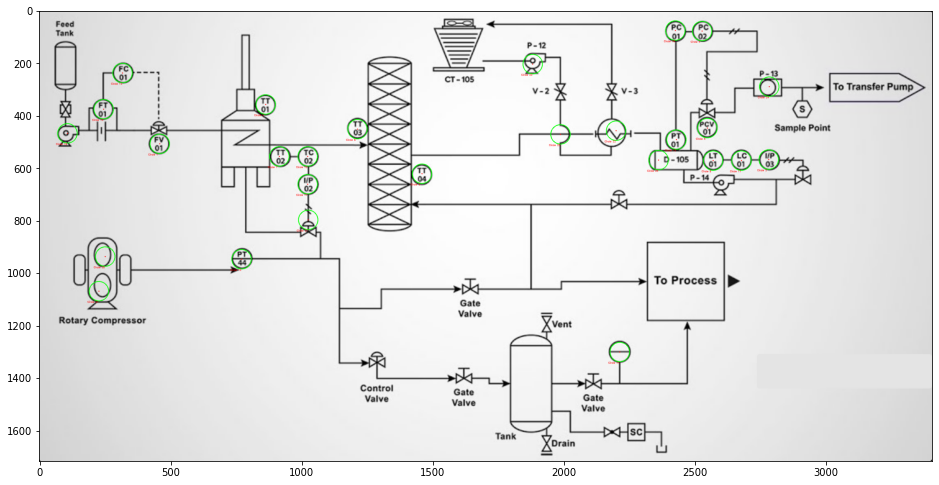

In [28]:
read_text_in_circles("pids/realpars_p_id_diag_mod.png", 1, 37, 38) # 39 circles are just 

In [ ]:
# try skeletonize and then ocr image

## updated skeletonize

In [49]:
# skeletonize doesn't work

import cv2
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import imutils
import re
from tqdm import tqdm
from skimage import morphology
from skimage.morphology import skeletonize

def load_image(url):
    img_path = url
    img = cv2.imread(img_path, 1)
    return img

def preprocessing(img, resize_factor): # try for resize_factor = 1
    # store height, width, 
    # depth and ratio
    h, w, d = img.shape
    resize_factor = resize_factor

    # resize image
    resized_image = imutils.resize(img, width=int(w / resize_factor))
    
    # tranform to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # blur image
    blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    return resized_image, gray_image, blur_image

def find_circles(img, blur_image, resized_image, resize_factor, minRadius, maxRadius):
    # identify circles
    all_circles = cv2.HoughCircles(blur_image,
    method=cv2.HOUGH_GRADIENT,
    dp=0.1,
    minDist=int(100 / resize_factor),
    param1=int(20 / resize_factor),
    param2=int(10 / resize_factor),
    minRadius=int(minRadius / resize_factor), # maxRadius=115
    maxRadius=int(maxRadius / resize_factor)) # maxRadius=120

    circles = np.uint16(np.around(all_circles))
    print("Found " + str(circles.shape[1]) + " circles.")


    count = 1
    img_circles = resized_image.copy()
    for circle in circles[0]:
        # Annotate circle and centroid
        cv2.circle(img_circles, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
        cv2.circle(img_circles, (circle[0], circle[1]), 2, (255, 0, 0), -2)

        # Annotate text
        offset_txt = int(circle[2] * 1.2)
        cv2.putText(
            img_circles,
            "Circle " + str(count),
            (circle[0] - offset_txt, circle[1] + offset_txt),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.3,
            (255, 0, 0),
            1,
        )
        count += 1
    
    plt.rcParams['figure.figsize'] = (16,9)
    plt.imshow(img_circles)
    plt.imsave(fname='img_output_circles.jpg', 
               arr=img_circles)

    return circles, img_circles

def ocr_text(img, circles, resize_factor, img_circles):
    # Read information in every circle
    cropped_imgs = []
    cropped_imgs_txt = []
    img_circle_txt = img.copy()

    circles_int = circles[0] * resize_factor

    for circle in tqdm(circles_int):
        up = ""
        low = ""

        x_offset_right = np.uint16(circle[2] * 0.79)
        x_offset_left = np.uint16(circle[2] * 0.65)
        y_offset_low = np.uint16(circle[2] * 0.72)
        y_offset_up = np.uint16(circle[2] * 0.56)

        cropped_img_lower = img_circle_txt[
            circle[1] : circle[1] + y_offset_low,
            circle[0] - x_offset_left : circle[0] + x_offset_right
        ]
        cropped_img_upper = img_circle_txt[
            circle[1] - y_offset_up : circle[1],
            circle[0] - x_offset_left : circle[0] + x_offset_right,
        ]
        cropped_imgs.append(np.append(cropped_img_upper, cropped_img_lower, axis=0))

        upper = pytesseract.image_to_string(
            cropped_img_upper,
            lang="eng",
            config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ",)
        lower = pytesseract.image_to_string(
            cropped_img_lower,
            config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789",)

        r_upper = re.compile(r"[A-Z]+")
        r_lower = re.compile(r"[A-Z0-9]+")

        if not upper.isspace():
            if re.match(r_upper, str(upper)).group(0) is not None:
                up = re.match(r_upper, str(upper)).group(0)            
        if not lower.isspace():
            if re.match(r_lower, str(lower)).group(0) is not None:
                low = re.match(r_lower, str(lower)).group(0)

        cropped_imgs_txt.append(up + "-" + low)
        plt.imsave(fname="img_output.jpg", arr=img_circles)
        
    return cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int

def read_text_in_circles(url, resize_factor, minRadius, maxRadius):
    img = load_image(url)
    resized_image, gray_image, blur_image = preprocessing(img, resize_factor)
    circles, img_circles = find_circles(img, blur_image, resized_image, resize_factor, minRadius,maxRadius)
    cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int = ocr_text(img, circles, resize_factor, img_circles)
    
    return circles, img_circle_txt, cropped_imgs_txt

Found 122 circles.


100%|██████████| 122/122 [14:56<00:00,  7.35s/it]


(array([[[ 8474,  2372,   119],
         [ 5908,  2372,   119],
         [ 9278,  7850,   119],
         [ 2814,  6396,   119],
         [ 3210,  6396,   119],
         [ 8116,  2746,   119],
         [ 6556,  8504,   119],
         [12066,  6396,   119],
         [ 5048,  2372,   119],
         [10586,  7598,   119],
         [ 9474,  2366,   119],
         [11668,  6392,   119],
         [12550,  2372,   119],
         [ 4348,  1158,   119],
         [ 4952,  8408,   119],
         [ 5428,  6390,   119],
         [ 8372,  7598,   119],
         [10330,  2372,   119],
         [11592,  8404,   119],
         [ 7164,  2668,   119],
         [ 9330,  1760,   119],
         [ 1732,  7598,   119],
         [ 1782,  2396,   119],
         [ 3694,  2372,   119],
         [ 4952,  2674,   119],
         [ 5858,  6794,   119],
         [ 6562,  1158,   119],
         [ 7160,  8408,   119],
         [ 9456,  6392,   119],
         [13908,  5988,   119],
         [ 3342,  8404,   119],
        

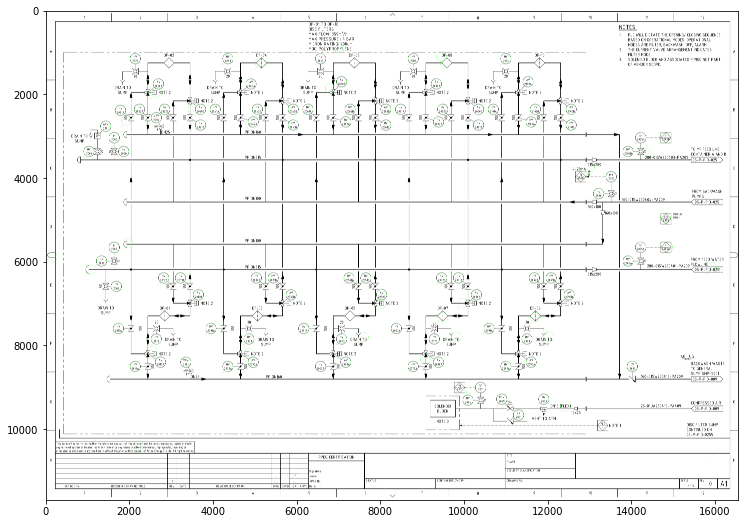

In [50]:
read_text_in_circles("output1.jpg", 1, 115, 120)

In [10]:
# try to add skeletonize

import cv2
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import imutils
import re
from tqdm import tqdm
from skimage import morphology
from skimage.morphology import skeletonize

def load_image(url):
    img_path = url
    img = cv2.imread(img_path, 1)
    return img

def preprocessing(img, resize_factor): # try for resize_factor = 1
    # store height, width, 
    # depth and ratio
    h, w, d = img.shape
    resize_factor = resize_factor

    # resize image
    resized_image = imutils.resize(img, width=int(w / resize_factor))
    
    # tranform to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # blur image
    blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    return resized_image, gray_image, blur_image

def skeletonize_image(url):
    # read image
    img = cv.imread(url, 0)
    # extract edges
    edges = cv.Canny(img,100,200)
    # transform to binary
    edges_binary = edges.copy()
    edges_binary[edges_binary != 0] = 1
    # skeleotnize image
    skeleton = skeletonize(edges_binary) 
    
    # print images
    plt.figure(figsize=(20,20))
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(skeleton,cmap = 'binary')
    plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
    plt.savefig("skel_edge_image.png")
    plt.show()
    return skeleton
    

def find_circles(img, blur_image, resized_image, resize_factor, minRadius, maxRadius):
    # identify circles
    all_circles = cv2.HoughCircles(blur_image,
    method=cv2.HOUGH_GRADIENT,
    dp=0.1,
    minDist=int(100 / resize_factor),
    param1=int(20 / resize_factor),
    param2=int(10 / resize_factor),
    minRadius=int(minRadius / resize_factor), # maxRadius=115
    maxRadius=int(maxRadius / resize_factor)) # maxRadius=120

    circles = np.uint16(np.around(all_circles))
    print("Found " + str(circles.shape[1]) + " circles.")


    count = 1
    img_circles = resized_image.copy()
    for circle in circles[0]:
        # Annotate circle and centroid
        cv2.circle(img_circles, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
        cv2.circle(img_circles, (circle[0], circle[1]), 2, (255, 0, 0), -2)

        # Annotate text
        offset_txt = int(circle[2] * 1.2)
        cv2.putText(
            img_circles,
            "Circle " + str(count),
            (circle[0] - offset_txt, circle[1] + offset_txt),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.3,
            (255, 0, 0),
            1,
        )
        count += 1
    
    plt.rcParams['figure.figsize'] = (16,9)
    plt.imshow(img_circles)
    plt.imsave(fname='img_output_circles_for_skel.jpg', 
               arr=img_circles)

    return circles, img_circles

def ocr_text(skeleton, circles, resize_factor, img_circles):
    # Read information in every circle
    cropped_imgs = []
    cropped_imgs_txt = []
    img_circle_txt = skeleton.copy()

    circles_int = circles[0] * resize_factor

    for circle in tqdm(circles_int):
        up = ""
        low = ""

        x_offset_right = np.uint16(circle[2] * 0.79)
        x_offset_left = np.uint16(circle[2] * 0.65)
        y_offset_low = np.uint16(circle[2] * 0.72)
        y_offset_up = np.uint16(circle[2] * 0.56)

        cropped_img_lower = img_circle_txt[
            circle[1] : circle[1] + y_offset_low,
            circle[0] - x_offset_left : circle[0] + x_offset_right
        ]
        cropped_img_upper = img_circle_txt[
            circle[1] - y_offset_up : circle[1],
            circle[0] - x_offset_left : circle[0] + x_offset_right,
        ]
        cropped_imgs.append(np.append(cropped_img_upper, cropped_img_lower, axis=0))

        upper = pytesseract.image_to_string(
            cropped_img_upper,
            lang="eng",
            config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ",)
        lower = pytesseract.image_to_string(
            cropped_img_lower,
            config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789",)

        r_upper = re.compile(r"[A-Z]+")
        r_lower = re.compile(r"[A-Z0-9]+")

        if not upper.isspace():
            if re.match(r_upper, str(upper)).group(0) is not None:
                up = re.match(r_upper, str(upper)).group(0)            
        if not lower.isspace():
            if re.match(r_lower, str(lower)).group(0) is not None:
                low = re.match(r_lower, str(lower)).group(0)

        cropped_imgs_txt.append(up + "-" + low)
        plt.imsave(fname="img_output_for_skel.jpg", arr=img_circles)
        
    return cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int

def read_text_in_circles(url, resize_factor, minRadius, maxRadius):
    img = load_image(url)
    resized_image, gray_image, blur_image = preprocessing(img, resize_factor)
    circles, img_circles = find_circles(img, blur_image, resized_image, resize_factor, minRadius,maxRadius)
    skeleton = skeletonize(img)
    cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int = ocr_text(skeleton, circles, resize_factor, img_circles)
    
    return circles, img_circle_txt, cropped_imgs_txt

In [11]:
img = load_image("output1.jpg")

In [12]:
resized_image, gray_image, blur_image = preprocessing(img, 1)

Found 122 circles.


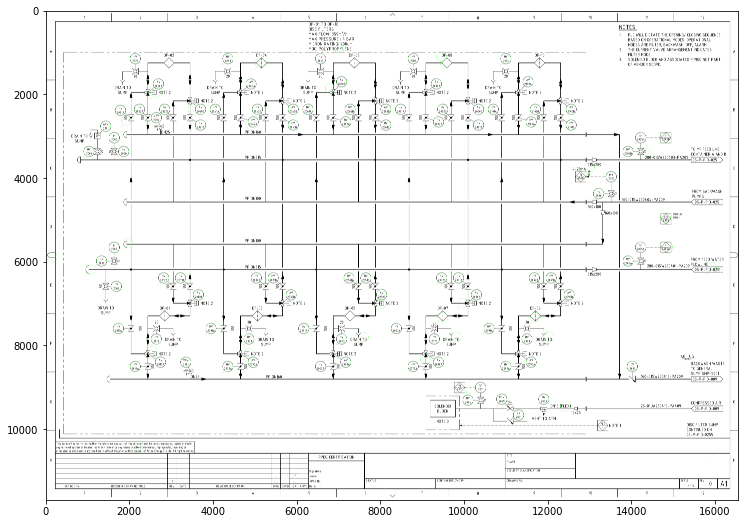

In [13]:
circles, img_circles = find_circles(img, blur_image, resized_image, 1, 115, 120)

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import morphology
from skimage.morphology import skeletonize

def skeletonize_image(url):
    # read image
    img = cv.imread(url, 0)
    # extract edges
    edges = cv.Canny(img,100,200)
    # transform to binary
    edges_binary = edges.copy()
    edges_binary[edges_binary != 0] = 1
    # skeleotnize image
    skeleton = skeletonize(edges_binary) 
    
    # print images
    plt.figure(figsize=(20,20))
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(skeleton,cmap = 'binary')
    plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
    plt.savefig("skel_edge_image.png")
    plt.show()
    return skeleton

In [14]:
cropped_imgs, cropped_imgs_txt, img_circle_txt, circles_int = ocr_text(skeleton, 
                                                                       circles, 
                                                                       1, 
                                                                       img_circles)

  0%|          | 0/122 [00:00<?, ?it/s]


ValueError: tile cannot extend outside image

In [ ]:
circles, img_circle_txt, cropped_imgs_txt = read_text_in_circles("output1.jpg", 1, 115, 120)

Found 122 circles.


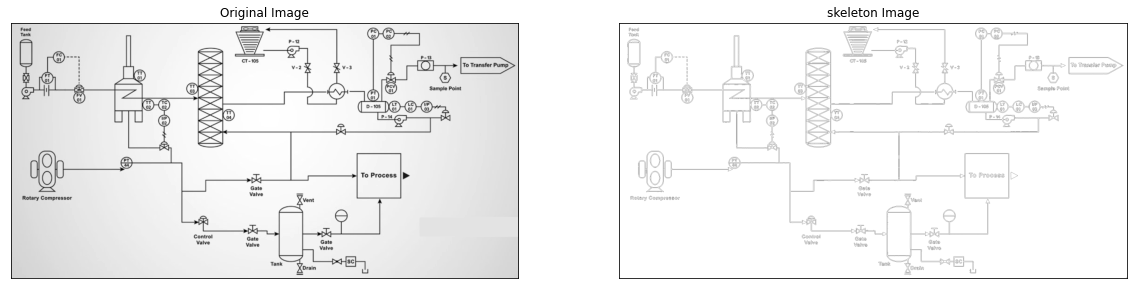

In [9]:
skeleton = skeletonize_image('realpars_p_id_diag_mod.png')

# Reading P&IDs

In [1]:
text = 'PDIT'

In [2]:
len(text)

4

In [59]:
# instrument letter identification
# based on ANSI/ISA-5.1.-1984 (R1992)
# https://www.aiche.org/sites/default/files/ChEnected-Example-PIDs-and-Lead-Sheets.pdf

variables = {"A":"ANALYZER",
             "B":"BURNER",
             "C":"USER'S CHOICE",
             "D":"USER'S CHOICE",
             "E":"VOLTAGE",
             "F":"FLOW",
             "G":"USER'S CHOICE",
             "H":"HAND",
             "I":"CURRENT",
             "J":"POWER",
             "K":"TIME",
             "L":"LEVEL",
             "M":"USER'S CHOICE",
             "N":"USER'S CHOICE",
             "O":"USER'S CHOICE",
             "P":"PRESSURE",
             "Q":"QUANTITY",
             "R":"RADIATION",
             "S":"SPEED",
             "T":"TEMPERATURE",  
             "U":"MULTI-VARIABLE",
             "V":"VIBRATION",
             "W":"WEIGHT, FORCE",
             "X":"UNCLASSIFIED",
             "Y":"EVENT, STATE",
             "Z":"POSITION"
            }

modifiers = {
            "C":"CONTROL",
            "D":"DIFFERENTIAL",
            "F":"RATIO",
            "J":"SCAN",
            "M":"MOMENTARY",
            "Q":"INTERGRATE/TOTALIZE",
            "R":"RELIEF",
            "S":"SAFETY",
            "X":"X-AXIS",
            "Y":"Y-AXIS",
            "Z":"Z-AXIS"
            }

indication_functionalities = {"A":"ALARM",
                              "B":"USER'S CHOICE",
                              "E":"PRIMARY ENTITY",
                              "G":"GLASS",
                              "I":"INDICATE",
                              "L":"LIGHT",
                              "N":"USER'S CHOICE",
                              "O":"OFFICE",
                              "P":"POINT TEST CONN.",
                              "R":"RECORD",
                              "U":"MULTI-FUNCTION",
                              "W":"WELL",
                              "X":"UNCLASSIFIED"
                              }

output_functionalities =     {"B":"USER'S CHOICE",
                              "C":"CONTROL",
                              "K":"CONTROL STATION",
                              "N":"USER'S CHOICE",
                              "S":"SWITCH",
                              "T":"TRANSMIT",
                              "U":"MULTI-FUNCTION",
                              "V":"VALVE, DAMPER",
                              "X":"UNCLASSIFIED",
                              "Y":"RELAY, COMPUTE",
                              "Z":"DRIVER, ACTUATOR UNCLASSIFIED FINAL CONTROL ELEMENT",
                              }

modifier_of_functionalities = {"B":"USER'S CHOICE",
                               "C":"CLOSE",
                               "H":"HIGH",
                               "L":"LOW",
                               "M":"MEDIUM",
                               "N":"USER'S CHOICE",
                               "O":"OPEN",
                               "U":"MULTI-FUNCTION",
                               "X":"UNCLASSIFIED"    
                              }

In [ ]:
TE

In [77]:
# how to interpret the letter in the circles
# which refer to physical devices
# https://www.aiche.org/chenected/2010/09/interpreting-piping-and-instrumentation-diagrams-symbology

def decipher_tag(text): # input is a string
    text = text.upper()
    variable = ''    
    modifier = ''
    indication_functionality = ''
    output_functionality = ''
    modifier_of_functionality = ''
    
    if len(text) == 2:
        variable = text[0]
        print("First letter means: ", variables[variable])
        
        if text[1] in indication_functionalities.keys():
            indication_functionality = text[1]
            print("Second letter means: ", indication_functionalities[indication_functionality])
            
        if text[1] in output_functionalities.keys():
            output_functionality = text[1] 
            print("Second letter means: ", output_functionalities[output_functionality])
            
    if len(text) == 3:
        variable = text[0]
        print("First letter means: ", variables[variable])
        
        indication_functionality = text[1]
        print("Second letter means %s: " 
              %  indication_functionalities[indication_functionality])
        
        output_functionality = text[2]    
        print("Third letter means %s: " 
              %output_functionalities[output_functionalities])
        
    if len(text) == 4:
        variable = text[0]
        print("First letter means: ", variables[variable])
        
        modifier = text[1]
        print("Second letter means: ", modifiers[modifier])
        
        indication_functionality = text[2]
        print("Third letter means: ", indication_functionalities[indication_functionality])
        
        output_functionality = text[3]
        print("Fourth letter means: ", output_functionalities[output_functionality])

    if len(text) == 5:
        variable = text[0]
        print("First letter means: ", variables[variable])
        
        modifier = text[1]
        print("Second letter means: ", modifiers[modifier])
        
        indication_functionality = text[2]
        print("Third letter means: ", indication_functionalities[indication_functionality])
        
        output_functionality = text[3]
        print("Fourth letter means: ", output_functionalities[output_functionality])
        
        modifier_of_functionality = text[4]
        print("Fifth letter means: ", modifier_of_functionalities[modifier_of_functionality])

    print("Text tag is: ",variable, 
          modifier, 
          indication_functionality, 
          output_functionality,
          modifier_of_functionality)
        
text = 'TT'        
decipher_tag(text)  

First letter means:  TEMPERATURE
Second letter means:  TRANSMIT
Text tag is:  T   T 


In [19]:
# transducer functions
# based on ANSI/ISA-5.1.-1984 (R1992)
# https://www.aiche.org/sites/default/files/ChEnected-Example-PIDs-and-Lead-Sheets.pdf

transducer_functions = {"E/E":"VOLTAGE TO VOLTAGE",
                        "E/I":"VOLTAGE TO CURRENT",
                        "E/P":"VOLTAGE TO PNEUMATIC",
                        "I/P":"CURRENT TO PNEUMATIC",
                        "P/I":"PNEUMATIC TO CURRENT"
                       }

In [21]:
# fluid service codes
# based on ANSI/ISA-5.1.-1984 (R1992)
# https://www.aiche.org/sites/default/files/ChEnected-Example-PIDs-and-Lead-Sheets.pdf

fluid_service_codes = {"ALM":"ALUMINUM SULFATE",
                       "AMN":"AMMONIUM NITRATE",
                       "AMH":"AMMONIUM HYDROXIDE",
                       "ABF":"AMMONIUM (BI)FLUORIDE",
                       "AMS":"AMMONIUM SULFATE",
                       "ASO":"ACID SOLUBLE ORGANICS",
                       "BAR":"BACKWASH AIR",
                       "CAF":"CALCIUM FLUORIDE",
                       "CAR":"COMPRESSED AIR",
                       "CBW":"CLEAN BACKWASH WATER",
                       "CFD":"CAUSTIC RAW FEED (GEN. USE)",
                       "CO2":"CARBON DIOXIDE",
                       "CHC":"CALCIUM HYPOCHLORITE",
                       "CL2":"CHLORINE",
                       "DBW":"DIRTH BACKWASH WATER",
                       "DRN":"PROCESS DRAIN",
                       "DSL":"DIESEL FUEL",
                       "EFF":"EFFLUENT (GENERAL USE)",
                       "FEC":"FERRIC CHLORIDE",
                       "FEW":"FILTER EFFLUENT WATER",
                       "FIW":"FILTER INFLUENT WATER",
                       "FOL":"FUEL OIL",
                       "HCL":"HYDROCHLORIC ACID",
                       "HF":"HYDROFLUORIC ACID",
                       "HPX":"HYDROGEN PEROXIDE",
                       "IAR":"INSTRUMENT AIR",
                       "IFD":"INDUSTRIAL RAW FEED",
                       "LSY":"LIME SLURRY",
                       "MEL":"METHANOLS",
                       "NAG":"NATURAL GAS",
                       "NIA":"NITRIC ACID",
                       "N2":"NITROGEN",
                       "OIL":"OIL (GENERAL USE)",
                       "PAR":"PROCESS AIR",
                       "PFD":"POLYMER FEED",
                       "PHA":"PHOSPHORIC ACID",
                       "KF":"POTASSIUM FLUORIDE",
                       "KOH":"POTASSIUM HYDROXIDE",
                       "PSL":"PROCESS SLURRY/SLUDGE",
                       "PVP":"PROCESS VAPOR",
                       "PWR":"POTABLE WATER",
                       "SAH":"SULFURIC ACID, >75%",
                       "SAL":"SULFURIC ACID, <75%",
                       "SHC":"SODIUM HYPOCHLORITE",
                       "SOC":"SODIUM CARBONATE",
                       "SOH":"SODIUM HYDROXIDE",
                       "SLP":"STEAM, <125#",
                       "SMB":"SODIUM METABISULFITE",
                       "STM":"STEAM, 125-220#",
                       "SNY":"SANITARY SEWER",
                       "STO":"STORM DRAIN",
                       "SWR":"SERVICE WATER",
                       "TFL":"THERMAL FLUID",
                       "UAR":"UTILITY AIR",
                       "UWR":"UTILITY WATER",
                       "VNT":"VENT (GENERAL USE)",
                       "WOL":"WASTE OIL",
                       "WWR":"WASTEWATER (GENERAL USE)"
                       }